In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


# 3) US Baby Names 1880–2017

Podatki: http://www.ssa.gov/oact/babynames/limits.html.

In [1]:
!head -n 10 data/DATA_03_names/yob1880.txt

Imena so v več datotekah

In [3]:
names1880 = pd.read_csv('data/DATA_03_names/yob1880.txt', names=['ime', 'spol','stevilo'])

In [4]:
names1880.head()

,ime,spol,stevilo
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby('spol')['stevilo'].sum()

spol
F     90993
M    110491
Name: stevilo, dtype: int64

In [6]:
#uvoz vseh podatkov
years = range(1880, 2018)
pieces = []
columns = ['ime', 'spol', 'stevilo']

In [7]:
for year in years:
    path = f'data/DATA_03_names/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)
    frame['leto'] = year
    pieces.append(frame)

In [9]:
names = pd.concat(pieces, ignore_index=True)

In [10]:
names.head()

,ime,spol,stevilo,leto
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [11]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 4 columns):
ime        object
spol       object
stevilo    int64
leto       int64
dtypes: int64(2), object(2)
memory usage: 58.7+ MB


##### Rad bi združil podatke, da bi bilo število moških in žensk glede na leto

In [12]:
total_births = names.pivot_table('stevilo', index='leto', columns='spol', aggfunc=sum)

In [13]:
total_births.tail()

spol,F,M
leto,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


In [15]:
#Pandas malo sm sam probu
neki = names.groupby(['leto','spol'])['stevilo'].sum()

In [16]:
neki.tail()

leto  spol
2015  M       1909804
2016  F       1763916
      M       1889052
2017  F       1711811
      M       1834490
Name: stevilo, dtype: int64

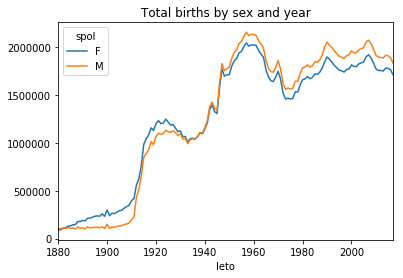

In [14]:
total_births.plot(title='Total births by sex and year')

##### Hočemo dobiti še verjetnost posameznega imena glede na leto

In [17]:
def add_prop(group):
    group['prop'] = group['stevilo'] / group['stevilo'].sum()
    return group

In [18]:
names = names.groupby(['leto', 'spol']).apply(add_prop)

In [20]:
names.head(10)

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [22]:
names.groupby(['leto', 'spol'])['prop'].sum().head(10) #vsota vseh verjetnosti je seveda 1

leto  spol
1880  F       1.0
      M       1.0
1881  F       1.0
      M       1.0
1882  F       1.0
      M       1.0
1883  F       1.0
      M       1.0
1884  F       1.0
      M       1.0
Name: prop, dtype: float64

##### Za vsak spol in leto bomo vzeli ven le top 1000 imen

In [23]:
def get_top1000(group):
    return group.sort_values(by='stevilo', ascending=False)[:1000]

In [24]:
grouped = names.groupby(['leto','spol'])

In [25]:
top1000 = grouped.apply(get_top1000)

In [26]:
top1000.head()

ime spol  stevilo  leto      prop
leto spol                                           
1880 F    0       Mary    F     7065  1880  0.077643
          1       Anna    F     2604  1880  0.028618
          2       Emma    F     2003  1880  0.022013
          3  Elizabeth    F     1939  1880  0.021309
          4     Minnie    F     1746  1880  0.019188

In [27]:
top1000.reset_index(inplace=True, drop=True)

In [28]:
top1000.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [29]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275877 entries, 0 to 275876
Data columns (total 5 columns):
ime        275877 non-null object
spol       275877 non-null object
stevilo    275877 non-null int64
leto       275877 non-null int64
prop       275877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.5+ MB


##### Ločimo moška in ženska imena, da vidimo popularnost skozi čas

In [30]:
boys = top1000[top1000['spol'] == 'M']
girls = top1000[top1000['spol'] == 'F']

In [31]:
boys.head()

,ime,spol,stevilo,leto,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
944,James,M,5927,1880,0.053642
945,Charles,M,5348,1880,0.048402
946,George,M,5126,1880,0.046393


In [32]:
girls.head()


,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


##### Hočemo tabelo: v vrsticah bo index leto, in v stolpcih posamezna imena

In [33]:
total_births = top1000.pivot_table('stevilo', index='leto', columns='ime', aggfunc=sum)

In [35]:
total_births.head(10)

ime,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
leto,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,...,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,...,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN,NaN


In [37]:
subset = total_births[['John','Harry','Mary','Khaleesi','Jon','Arya']]

In [38]:
subset.head()

ime,John,Harry,Mary,Khaleesi,Jon,Arya
leto,,,,,,
1880,9701.0,2158.0,7092.0,NaN,NaN,NaN
1881,8795.0,2002.0,6948.0,NaN,NaN,NaN
1882,9597.0,2246.0,8178.0,NaN,NaN,NaN
1883,8934.0,2116.0,8044.0,NaN,NaN,NaN
1884,9428.0,2338.0,9253.0,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6227226780>,
      dtype=object)

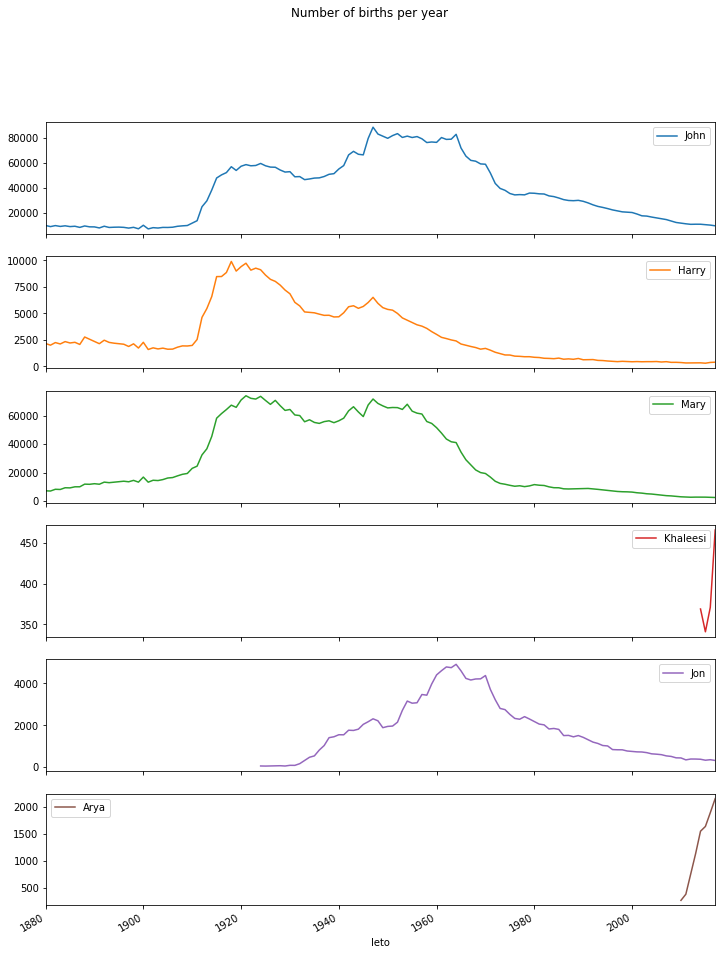

In [39]:
subset.plot(subplots=True, figsize=(12,16), grid=False, title='Number of births per year')

##### Koliko odstotkov imen se je nahajalo v top 1000? Kakšna je bila raznolikost imen glede na leto

In [40]:
table = top1000.pivot_table('prop', index='leto', columns='spol', aggfunc=sum)

In [41]:
table.head()

spol,F,M
leto,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


In [42]:
table.tail()

spol,F,M
leto,,
2013,0.739979,0.843230
2014,0.743431,0.842633
2015,0.742381,0.841002
2016,0.742093,0.837375
2017,0.741075,0.833839


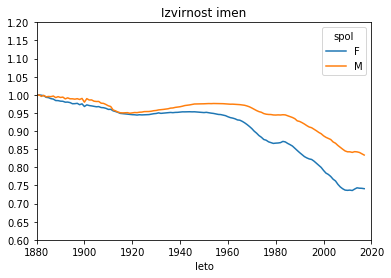

In [43]:
table.plot(title='Izvirnost imen', yticks=np.linspace(0.6,1.2,13), xticks=range(1880,2030,20))